In [56]:
import os, random, time
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

def pyplots(images, titles=None):
    num = len(images)
    plt.figure(figsize=(15,6))
    for index, im in enumerate(images):
        plt.subplot(2, num/2, index+1)
        plt.imshow(im, cmap='gray')
        if titles is None:
            plt.title('%d'%(index))
        else:
            plt.title(str(titles[index]))
        plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

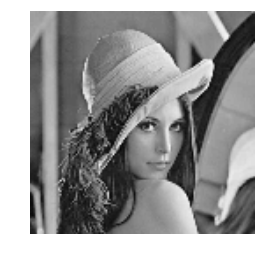

In [57]:
base_image = '/home/kampta/data/sample/lena.jpg'
img = cv2.resize(cv2.cvtColor(cv2.imread(base_image),
                              cv2.COLOR_BGR2GRAY),
                 (128,128),
                 interpolation = cv2.INTER_CUBIC)

plt.imshow(img, cmap='gray')
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

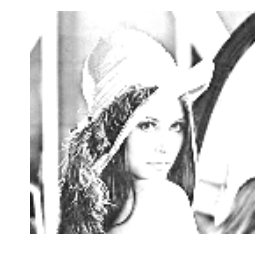

In [58]:
def change_brightness(img, ratio):
    img = img.astype('float')
    img = img*ratio
    img[img>255.] = 255.
    return img.astype(np.uint8)

plt.imshow(change_brightness(img, 2), cmap='gray')
plt.axis('off')

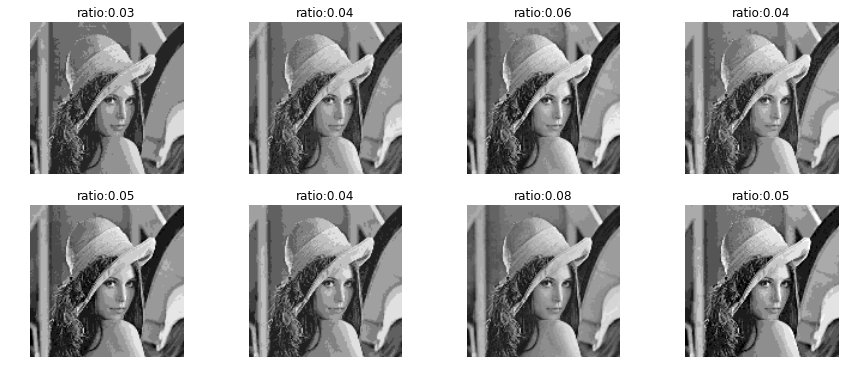

In [59]:
images = []
titles = []

for ratio in np.arange(0, 5, .001):
    new_img = change_brightness(img, ratio)
    images.append(new_img)
    titles.append('ratio:%.2f'%ratio)

images = np.array(images)
titles = np.array(titles)

sample = random.sample(range(100), 8)
pyplots(images[sample], titles[sample])

In [66]:
class LinearSearch:
    def __init__(self, data):
        self.data = [img.flatten().astype(np.float32) for img in data]
        
    def searchSingle(self, query, k):
        query = query.flatten().astype(np.float32)
        distances = []
        for img in self.data:
            distance = np.linalg.norm(img - query)
            distances.append(distance)
        
        return np.argsort(distances, axis=0)[:k]
    
    def searchMultiple(self, queries, k):
        nbrs = []
        for query in queries:
            nbrs.append(self.searchSingle(query, k))    
        return nbrs
    
class FLANNSearch:  
    def __init__(self, data):
        FLANN_INDEX_KMEANS = 2
        FLANN_DIST_L2 = 1
        self.data = np.array([img.flatten().astype(np.float32) for img in data])
        params = dict(algorithm=FLANN_INDEX_KMEANS, iterations=5, branching=64)
        self.idx = cv2.flann.Index(self.data, params, distType=FLANN_DIST_L2)
        
    def searchSingle(self, query, k):
        query = np.array([query.flatten().astype(np.float32)])
        indices, dists = self.idx.knnSearch(query, k, params={})
        
        return indices[0]
    
    def searchMultiple(self, queries, k):
        queries = np.array([query.flatten().astype(np.float32) for query in queries])
        indices, dists = self.idx.knnSearch(queries, k, params={})
        return indices
    

## Single Search Query Performance

In [62]:
linsearch = LinearSearch(images)
query = images[1]
%timeit linsearch.searchSingle(query, k=8)

10 loops, best of 3: 136 ms per loop


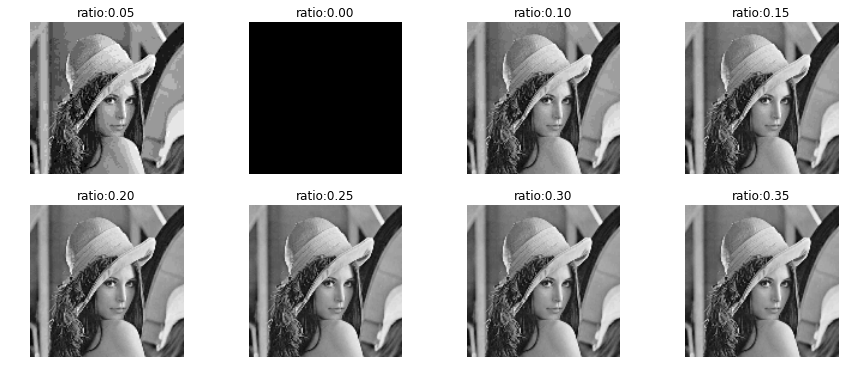

In [17]:
nn = linsearch.searchSingle(query, k=8)
pyplots(images[nn], titles[nn])

In [67]:
flannsearch = FLANNSearch(images)
query = images[1]
%timeit flannsearch.searchSingle(query, k=8)

100 loops, best of 3: 2.16 ms per loop


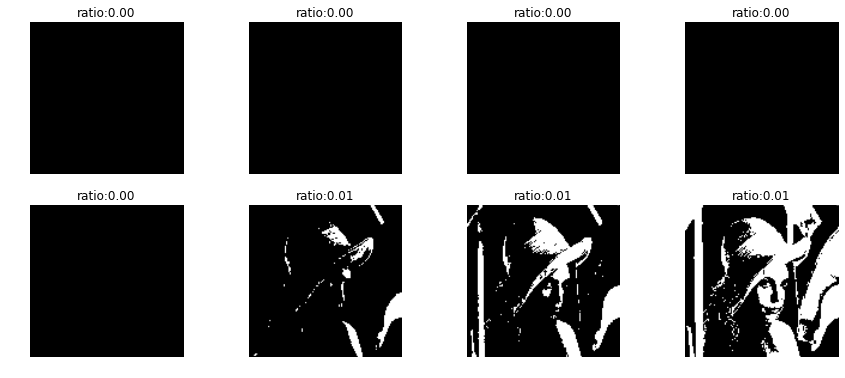

In [70]:
nn = flannsearch.searchSingle(query, k=8)
pyplots(images[nn], titles[nn])

## Multiple Search Query Performance

In [68]:
queries = images[1:100]
%time x = linsearch.searchMultiple(queries, k=8)

CPU times: user 1min 2s, sys: 1.27 s, total: 1min 4s
Wall time: 16 s


In [69]:
queries = images[1:100]
%time x = flannsearch.searchMultiple(queries, k=8)

CPU times: user 196 ms, sys: 0 ns, total: 196 ms
Wall time: 195 ms
